In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime

In [2]:
ROOT_PATH = Path().resolve().parent
dataset_path = ROOT_PATH / "data/airlines_delay.csv"

In [3]:
dataset = pd.read_csv(dataset_path, sep=",")
dataset.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [4]:
dataset.dtypes

Flight         float64
Time           float64
Length         float64
Airline         object
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Class            int64
dtype: object

In [5]:
dataset.describe()

,Flight,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


In [11]:
print("Amount of Airlines:", len(dataset["Airline"].unique()))
print("Amount of AirportFrom:", len(dataset["AirportFrom"].unique()))
print("Amount of AirportTo:", len(dataset["AirportTo"].unique()))

Amount of Airlines: 18
Amount of AirportFrom: 293
Amount of AirportTo: 293


Too much Airlines and Places to make it binary as dummy.\
In this case I'll only make them become 'Factors'

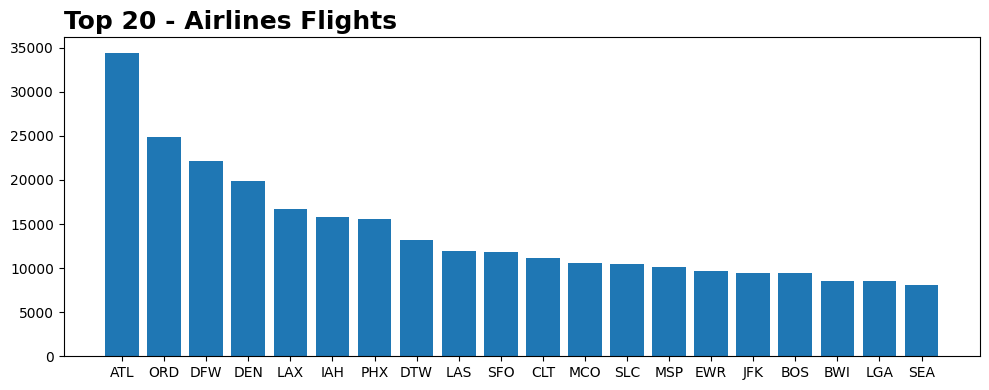

In [39]:
mostFlownAirlines = dataset.groupby(["AirportFrom"])["Airline"].count().sort_values(ascending=False)[:20]

plt.figure(figsize=(10, 4))
plt.bar(x=mostFlownAirlines.index, height=mostFlownAirlines.values)
plt.title(
    "Top 20 - Airlines Flights", 
    loc="left", 
    fontweight="bold", 
    fontsize=18
    )
plt.tight_layout()
plt.show()

#### Days with the major amount of Flights

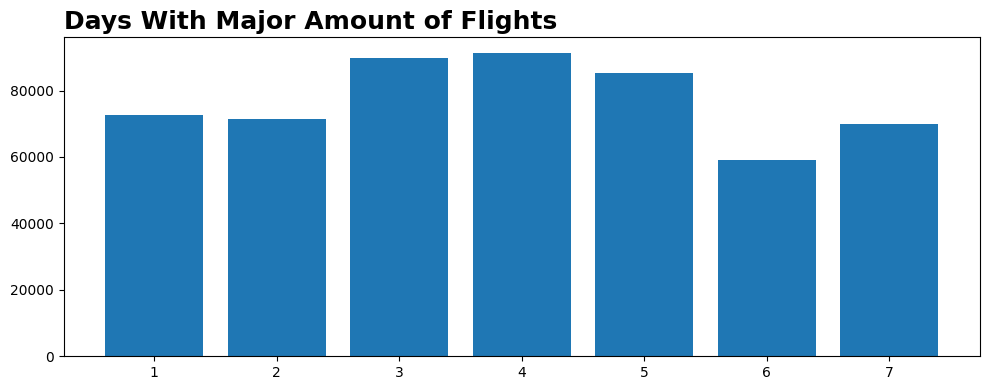

In [40]:
mostFlownDays = dataset.groupby(["DayOfWeek"])["DayOfWeek"].count().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
plt.bar(x=mostFlownDays.index, height=mostFlownDays.values)
plt.title(
    "Days With Major Amount of Flights", 
    loc="left", 
    fontweight="bold", 
    fontsize=18
    )
plt.tight_layout()
plt.show()

#### Airline Flights Per Day

In [ ]:
mostFlownDaysPerAirline = [
    (
    airline, 
    dataset[dataset["Airline"]==airline].groupby(
        ["DayOfWeek"]
        )["DayOfWeek"].count()
        ) for airline in dataset["Airline"].unique()
        ]

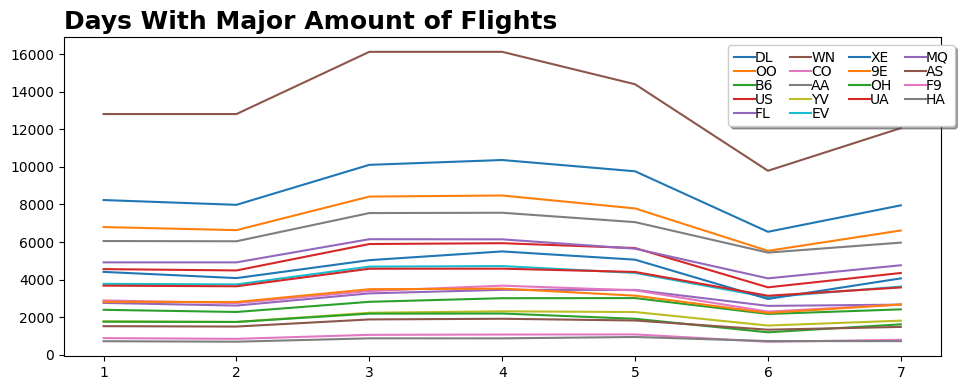

In [81]:
plt.figure(figsize=(10, 4))

for airline_takeOffs in mostFlownDaysPerAirline:
    legend = airline_takeOffs[0]
    index_input = airline_takeOffs[1].index
    dados_input = airline_takeOffs[1].values
    plt.plot(index_input, dados_input)
    plt.title(
        "Days With Major Amount of Flights", 
        loc="left", 
        fontweight="bold", 
        fontsize=18
        )
    plt.legend(
        dataset["Airline"].unique(), loc="best", ncols=4, 
        bbox_to_anchor=[0.75, 0.7], 
        columnspacing=1.0, labelspacing=0.0,
        handletextpad=0.0, handlelength=1.5,
        fancybox=True, shadow=True
        )

plt.tight_layout()
plt.show()

#### Days with the most Delaied Flights (Checking Data Balancing)